# GPT 4o with v2.26 prompt

This notebook outlines the steps undertook to generate a prediction using GPT4o with prompt from 2/26/25.

Using Claude prompt because the two models have similar prompt guide.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from gpt_new_pred_utils import predict
from evaluate_predictions import show_metrics

from instructions import gpt_instructions_v226
MODEL_ID = "gpt-4o-2024-11-20"
SYSTEM_PROMPT = gpt_instructions_v226

# Load the data

In [2]:
df = pd.read_csv("data/dataset_v1.csv")
len(df)

1084

In [3]:
df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,opinion_types,opinion_sources,cite_names,filename
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,['010combined'],['html_with_citations'],"['7 Wall. 700', 'White', 'Texas']",0001.91306_cites_88061.txt
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,['010combined'],['html_with_citations'],['21 Wall. 138'],0002.91306_cites_88994.txt
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,['010combined'],['html_with_citations'],['2 Wall. 110'],0003.91306_cites_87633.txt
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,['010combined'],['html_with_citations'],"['Texas', 'Hardenberg', '10 Wall. 68']",0004.91306_cites_88240.txt
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,['010combined'],['html_with_citations'],"['Texas', '16 Wall. 402']",0005.91306_cites_88693.txt


# Use the model to generation predictions

In [4]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 0
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 2
INFO:root:Completed: 3
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 1
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 4
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 6
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 9
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:Completed: 5
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 O

CPU times: user 49.5 s, sys: 5.39 s, total: 54.9 s
Wall time: 12min 1s


[{'0001.91306_cites_88061.txt': {'model': 'gpt-4o-2024-11-20',
   'input_tokens': 5554,
   'output_tokens': 115,
   'prediction': 'yes',
   'confidence': 0.95,
   'rationale': 'The Acting Case explicitly states that the original decision in Texas v. White has been questioned and limited in important particulars. It specifically mentions that certain positions taken in Texas v. White must be regarded as overruled, indicating Explicit Negative Actions. Therefore, the Target Case is overruled.',
   'instructions': 'Determine whether the Acting Case overruled the Target Case.',
   'target_case': 'Texas v. White',
   'raw_results': '\n  {\n  "instructions": "Determine whether the Acting Case overruled the Target Case.",\n  "target_case": "Texas v. White",\n  "overruled": "yes",\n  "confidence": 0.95,\n  "rationale": "The Acting Case explicitly states that the original decision in Texas v. White has been questioned and limited in important particulars. It specifically mentions that certain p

In [5]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,0001.91306_cites_88061.txt,gpt-4o-2024-11-20,5554,115,yes,0.95,The Acting Case explicitly states that the ori...,Determine whether the Acting Case overruled th...,Texas v. White,"\n {\n ""instructions"": ""Determine whether th..."
1,0003.91306_cites_87633.txt,gpt-4o-2024-11-20,3160,115,no,0.95,The Acting Case explicitly reaffirms the rules...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"\n {\n ""instructions"": ""Determine whether th..."
2,0004.91306_cites_88240.txt,gpt-4o-2024-11-20,4705,115,no,0.85,"The Acting Case discusses the Target Case, Tex...",Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"\n {\n ""instructions"": ""Determine whether th..."
3,0002.91306_cites_88994.txt,gpt-4o-2024-11-20,4082,129,no,0.95,The Acting Case discusses the Target Case in d...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"\n{\n ""instructions"": ""Determine whether the ..."
4,0005.91306_cites_88693.txt,gpt-4o-2024-11-20,4618,131,no,0.85,The Acting Case discusses Huntington v. Texas ...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"\n{\n ""instructions"": ""Determine whether the ..."


## Save the raw prediction results

In [6]:
prediction_df.to_csv("predictions/4.gpt/0.gpt4o_v226_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [7]:
prediction_df["prediction"].isna().sum()

0

In [8]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
#prediction_df = pd.read_csv("predictions/4.gpt/0.gpt4o_v226_prompt.csv")

In [9]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [10]:
assert len(df) == len(prediction_df)

In [11]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,...,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),...,0001.91306_cites_88061.txt,gpt-4o-2024-11-20,5554,115,yes,0.95,The Acting Case explicitly states that the ori...,Determine whether the Acting Case overruled th...,Texas v. White,"\n {\n ""instructions"": ""Determine whether th..."
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),...,0002.91306_cites_88994.txt,gpt-4o-2024-11-20,4082,129,no,0.95,The Acting Case discusses the Target Case in d...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"\n{\n ""instructions"": ""Determine whether the ..."
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),...,0003.91306_cites_87633.txt,gpt-4o-2024-11-20,3160,115,no,0.95,The Acting Case explicitly reaffirms the rules...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"\n {\n ""instructions"": ""Determine whether th..."
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),...,0004.91306_cites_88240.txt,gpt-4o-2024-11-20,4705,115,no,0.85,"The Acting Case discusses the Target Case, Tex...",Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"\n {\n ""instructions"": ""Determine whether th..."
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),...,0005.91306_cites_88693.txt,gpt-4o-2024-11-20,4618,131,no,0.85,The Acting Case discusses Huntington v. Texas ...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"\n{\n ""instructions"": ""Determine whether the ..."


# Run evaluation

In [12]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [13]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [14]:
eval_df["prediction"].value_counts()

prediction
no     901
yes    183
Name: count, dtype: int64

In [15]:
eval_df["input_tokens"].sum()

5812042

In [16]:
eval_df["output_tokens"].sum()

144849

In [17]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0})

In [18]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.98      0.94      0.96       935
         Yes       0.70      0.87      0.78       149

    accuracy                           0.93      1084
   macro avg       0.84      0.90      0.87      1084
weighted avg       0.94      0.93      0.93      1084



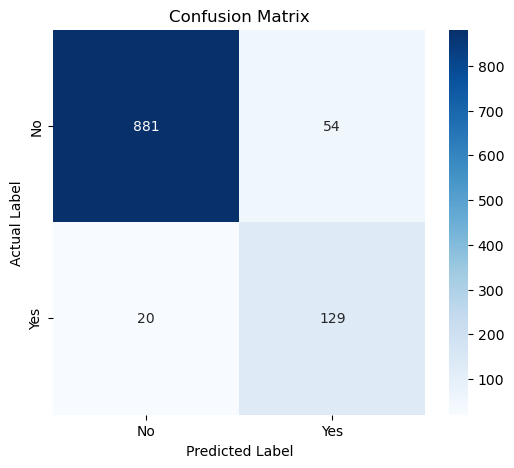

In [19]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [20]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.93
Precision: 0.70
Recall: 0.87
F-score: 0.78
Specificity: 0.94
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 129
True negatives: 881
False positives: 54
False negatives: 20


In [21]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

54

In [22]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

20

# Save the evaluation df

In [23]:
eval_df.head()

,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,...,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,instructions,target_case,raw_results
0,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),...,0001.91306_cites_88061.txt,gpt-4o-2024-11-20,5554,115,yes,0.95,The Acting Case explicitly states that the ori...,Determine whether the Acting Case overruled th...,Texas v. White,"\n {\n ""instructions"": ""Determine whether th..."
1,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),...,0002.91306_cites_88994.txt,gpt-4o-2024-11-20,4082,129,no,0.95,The Acting Case discusses the Target Case in d...,Determine whether the Acting Case overruled th...,Vermilye & Co. v. Adams Express Co.,"\n{\n ""instructions"": ""Determine whether the ..."
2,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),...,0003.91306_cites_87633.txt,gpt-4o-2024-11-20,3160,115,no,0.95,The Acting Case explicitly reaffirms the rules...,Determine whether the Acting Case overruled th...,Murray v. Lardner,"\n {\n ""instructions"": ""Determine whether th..."
3,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),...,0004.91306_cites_88240.txt,gpt-4o-2024-11-20,4705,115,no,0.85,"The Acting Case discusses the Target Case, Tex...",Determine whether the Acting Case overruled th...,Texas v. Hardenberg,"\n {\n ""instructions"": ""Determine whether th..."
4,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),...,0005.91306_cites_88693.txt,gpt-4o-2024-11-20,4618,131,no,0.85,The Acting Case discusses Huntington v. Texas ...,Determine whether the Acting Case overruled th...,Huntington v. Texas,"\n{\n ""instructions"": ""Determine whether the ..."


In [24]:
eval_df.to_csv("predictions/4.gpt/0.gpt4o_v226_prompt_eval.csv", index=False)